In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [100]:
folder_path = './PRSA_Data_20130301-20170228/'

In [101]:
files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

In [102]:
all_data = []

In [103]:
for file in files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    station_name = file.split('_')[2]  # Ambil nama stasiun dari nama file
    df['station'] = station_name
    all_data.append(df)

In [104]:
combined_data = pd.concat(all_data, ignore_index=True)

In [105]:
print(combined_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB
None


In [106]:
print(combined_data.describe())

                  No           year          month            day  \
count  420768.000000  420768.000000  420768.000000  420768.000000   
mean    17532.500000    2014.662560       6.522930      15.729637   
std     10122.116943       1.177198       3.448707       8.800102   
min         1.000000    2013.000000       1.000000       1.000000   
25%      8766.750000    2014.000000       4.000000       8.000000   
50%     17532.500000    2015.000000       7.000000      16.000000   
75%     26298.250000    2016.000000      10.000000      23.000000   
max     35064.000000    2017.000000      12.000000      31.000000   

                hour          PM2.5           PM10            SO2  \
count  420768.000000  412029.000000  414319.000000  411747.000000   
mean       11.500000      79.793428     104.602618      15.830835   
std         6.922195      80.822391      91.772426      21.650603   
min         0.000000       2.000000       2.000000       0.285600   
25%         5.750000      20.0000

In [107]:
print(combined_data.isnull().sum())

No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64


In [108]:
duplicates = combined_data.duplicated().sum()
print(f'Jumlah data duplikat: {duplicates}')

Jumlah data duplikat: 0


In [109]:
combined_data['datetime'] = pd.to_datetime(combined_data[['year', 'month', 'day', 'hour']], errors='coerce')
print(combined_data['datetime'].head())

0   2013-03-01 00:00:00
1   2013-03-01 01:00:00
2   2013-03-01 02:00:00
3   2013-03-01 03:00:00
4   2013-03-01 04:00:00
Name: datetime, dtype: datetime64[ns]


In [110]:
print(combined_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 19 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   No        420768 non-null  int64         
 1   year      420768 non-null  int64         
 2   month     420768 non-null  int64         
 3   day       420768 non-null  int64         
 4   hour      420768 non-null  int64         
 5   PM2.5     412029 non-null  float64       
 6   PM10      414319 non-null  float64       
 7   SO2       411747 non-null  float64       
 8   NO2       408652 non-null  float64       
 9   CO        400067 non-null  float64       
 10  O3        407491 non-null  float64       
 11  TEMP      420370 non-null  float64       
 12  PRES      420375 non-null  float64       
 13  DEWP      420365 non-null  float64       
 14  RAIN      420378 non-null  float64       
 15  wd        418946 non-null  object        
 16  WSPM      420450 non-null  float64    

In [111]:
print(combined_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 19 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   No        420768 non-null  int64         
 1   year      420768 non-null  int64         
 2   month     420768 non-null  int64         
 3   day       420768 non-null  int64         
 4   hour      420768 non-null  int64         
 5   PM2.5     412029 non-null  float64       
 6   PM10      414319 non-null  float64       
 7   SO2       411747 non-null  float64       
 8   NO2       408652 non-null  float64       
 9   CO        400067 non-null  float64       
 10  O3        407491 non-null  float64       
 11  TEMP      420370 non-null  float64       
 12  PRES      420375 non-null  float64       
 13  DEWP      420365 non-null  float64       
 14  RAIN      420378 non-null  float64       
 15  wd        418946 non-null  object        
 16  WSPM      420450 non-null  float64    

In [112]:
print(combined_data.describe())

                  No           year          month            day  \
count  420768.000000  420768.000000  420768.000000  420768.000000   
mean    17532.500000    2014.662560       6.522930      15.729637   
min         1.000000    2013.000000       1.000000       1.000000   
25%      8766.750000    2014.000000       4.000000       8.000000   
50%     17532.500000    2015.000000       7.000000      16.000000   
75%     26298.250000    2016.000000      10.000000      23.000000   
max     35064.000000    2017.000000      12.000000      31.000000   
std     10122.116943       1.177198       3.448707       8.800102   

                hour          PM2.5           PM10            SO2  \
count  420768.000000  412029.000000  414319.000000  411747.000000   
mean       11.500000      79.793428     104.602618      15.830835   
min         0.000000       2.000000       2.000000       0.285600   
25%         5.750000      20.000000      36.000000       3.000000   
50%        11.500000      55.0000

In [113]:
combined_data.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01 00:00:00
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01 01:00:00
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01 02:00:00
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01 03:00:00
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01 04:00:00


In [114]:
print(combined_data.columns)

Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station',
       'datetime'],
      dtype='object')


In [115]:
combined_data.set_index('datetime', inplace=True)

In [116]:
print(combined_data.columns)

Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')


In [117]:
print(combined_data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 420768 entries, 2013-03-01 00:00:00 to 2017-02-28 23:00:00
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 61.0+ MB
None


In [118]:
combined_data.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
2013-03-01 01:00:00,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2013-03-01 02:00:00,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
2013-03-01 03:00:00,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
2013-03-01 04:00:00,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [119]:
combined_data.interpolate(method='time', inplace=True)

C:\Users\ichaa\AppData\Local\Temp\ipykernel_11608\3276815885.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  combined_data.interpolate(method='time', inplace=True)


In [120]:
print(combined_data.isnull().sum())

No            0
year          0
month         0
day           0
hour          0
PM2.5         0
PM10          0
SO2           0
NO2           0
CO            0
O3            0
TEMP          0
PRES          0
DEWP          0
RAIN          0
wd         1822
WSPM          0
station       0
dtype: int64


In [121]:
combined_data[combined_data['wd'].isnull()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,,,,,,
2013-11-22 04:00:00,6389,2013,11,22,4,82.0,74.0,15.0,75.0,1300.0,5.1408,-3.200,1020.5,-4.0,0.0,NaN,0.10,Aotizhongxin
2014-07-02 06:00:00,11719,2014,7,2,6,44.0,44.0,2.0,16.0,800.0,105.0000,21.500,998.2,21.5,0.1,NaN,0.20,Aotizhongxin
2014-09-10 20:00:00,13413,2014,9,10,20,56.0,141.0,13.0,81.0,700.0,99.0000,21.700,1008.0,15.8,0.0,NaN,0.00,Aotizhongxin
2015-01-27 20:00:00,16749,2015,1,27,20,26.0,42.0,12.0,78.0,1300.0,2.0000,-6.000,1025.0,-16.3,0.0,NaN,1.00,Aotizhongxin
2015-02-18 07:00:00,17264,2015,2,18,7,13.0,14.0,12.0,22.0,600.0,60.0000,1.500,1022.5,-12.6,0.0,NaN,1.45,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-01-28 18:00:00,34315,2017,1,28,18,257.0,281.0,48.0,75.0,2800.0,8.0000,0.625,1016.0,-7.9,0.0,NaN,0.50,Wanshouxigong
2017-01-29 14:00:00,34335,2017,1,29,14,13.0,46.0,4.0,6.0,300.0,64.0000,-1.220,1025.0,-21.6,0.0,NaN,6.50,Wanshouxigong
2017-02-08 00:00:00,34561,2017,2,8,0,104.0,113.0,17.0,87.0,1900.0,2.0000,-2.800,1026.3,-7.0,0.0,NaN,0.20,Wanshouxigong


In [122]:
combined_data.wd.value_counts()

wd
NE     43335
ENE    34142
NW     32600
N      30869
E      29752
SW     28756
NNE    28232
NNW    25326
WNW    24375
ESE    24220
SSW    22563
SE     20074
WSW    20040
S      19405
SSE    17694
W      17563
Name: count, dtype: int64

In [123]:
print(combined_data.index)

DatetimeIndex(['2013-03-01 00:00:00', '2013-03-01 01:00:00',
               '2013-03-01 02:00:00', '2013-03-01 03:00:00',
               '2013-03-01 04:00:00', '2013-03-01 05:00:00',
               '2013-03-01 06:00:00', '2013-03-01 07:00:00',
               '2013-03-01 08:00:00', '2013-03-01 09:00:00',
               ...
               '2017-02-28 14:00:00', '2017-02-28 15:00:00',
               '2017-02-28 16:00:00', '2017-02-28 17:00:00',
               '2017-02-28 18:00:00', '2017-02-28 19:00:00',
               '2017-02-28 20:00:00', '2017-02-28 21:00:00',
               '2017-02-28 22:00:00', '2017-02-28 23:00:00'],
              dtype='datetime64[ns]', name='datetime', length=420768, freq=None)


In [124]:
combined_data.loc['2013-11-22']

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,,,,,,
2013-11-22 00:00:00,6385,2013,11,22,0,164.0,171.0,50.0,110.0,3200.0,6.2118,-1.6,1021.0,-2.9,0.0,ENE,0.2,Aotizhongxin
2013-11-22 01:00:00,6386,2013,11,22,1,144.0,177.0,56.0,103.0,3500.0,3.4272,-1.8,1021.1,-2.9,0.0,WSW,0.8,Aotizhongxin
2013-11-22 02:00:00,6387,2013,11,22,2,160.0,200.0,43.0,84.0,3800.0,1.4994,-2.4,1021.0,-3.4,0.0,NE,0.2,Aotizhongxin
2013-11-22 03:00:00,6388,2013,11,22,3,147.0,160.0,30.0,75.0,2300.0,4.4982,-2.9,1020.9,-3.9,0.0,SW,0.5,Aotizhongxin
2013-11-22 04:00:00,6389,2013,11,22,4,82.0,74.0,15.0,75.0,1300.0,5.1408,-3.2,1020.5,-4.0,0.0,NaN,0.1,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-11-22 19:00:00,6404,2013,11,22,19,236.0,273.0,69.0,114.0,2900.0,1.0000,2.8,1015.6,-2.1,0.0,SW,0.5,Wanshouxigong
2013-11-22 20:00:00,6405,2013,11,22,20,318.0,348.0,91.0,122.0,4000.0,4.0000,2.5,1015.7,-1.5,0.0,W,1.2,Wanshouxigong
2013-11-22 21:00:00,6406,2013,11,22,21,346.0,365.0,129.0,124.0,4600.0,5.0000,1.8,1015.6,-1.1,0.0,W,0.7,Wanshouxigong


In [125]:
combined_data.loc['2014-07-02']

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,,,,,,
2014-07-02 00:00:00,11713,2014,7,2,0,22.0,22.0,2.0,26.0,900.0,122.0,21.5,998.8,21.5,0.0,ENE,1.3,Aotizhongxin
2014-07-02 01:00:00,11714,2014,7,2,1,28.0,28.0,2.0,24.0,900.0,118.0,21.4,998.7,21.4,0.0,ENE,1.5,Aotizhongxin
2014-07-02 02:00:00,11715,2014,7,2,2,41.0,41.0,2.0,24.0,600.0,108.0,21.4,998.4,21.4,0.0,ENE,0.7,Aotizhongxin
2014-07-02 03:00:00,11716,2014,7,2,3,42.0,42.0,2.0,14.0,700.0,118.0,21.3,997.8,21.3,1.8,NE,0.9,Aotizhongxin
2014-07-02 04:00:00,11717,2014,7,2,4,45.0,45.0,3.0,15.0,600.0,103.0,21.2,997.5,21.2,0.2,ENE,0.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-07-02 19:00:00,11732,2014,7,2,19,82.0,89.0,2.0,34.0,1000.0,119.0,25.3,995.9,21.8,0.0,SW,0.3,Wanshouxigong
2014-07-02 20:00:00,11733,2014,7,2,20,105.0,119.0,2.0,33.0,1000.0,98.0,25.2,996.3,21.9,0.0,NE,0.3,Wanshouxigong
2014-07-02 21:00:00,11734,2014,7,2,21,115.0,129.0,2.0,42.0,1000.0,78.0,24.6,996.2,21.9,0.0,WSW,1.2,Wanshouxigong


In [126]:
combined_data['wd'].fillna(method='ffill', inplace=True)

C:\Users\ichaa\AppData\Local\Temp\ipykernel_11608\786237553.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_data['wd'].fillna(method='ffill', inplace=True)
C:\Users\ichaa\AppData\Local\Temp\ipykernel_11608\786237553.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_data['wd'].fillna(method='ffill', inplace=True)


In [127]:
print(combined_data.isnull().sum())

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64


In [128]:
combined_data.loc['2013-11-22']

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,,,,,,
2013-11-22 00:00:00,6385,2013,11,22,0,164.0,171.0,50.0,110.0,3200.0,6.2118,-1.6,1021.0,-2.9,0.0,ENE,0.2,Aotizhongxin
2013-11-22 01:00:00,6386,2013,11,22,1,144.0,177.0,56.0,103.0,3500.0,3.4272,-1.8,1021.1,-2.9,0.0,WSW,0.8,Aotizhongxin
2013-11-22 02:00:00,6387,2013,11,22,2,160.0,200.0,43.0,84.0,3800.0,1.4994,-2.4,1021.0,-3.4,0.0,NE,0.2,Aotizhongxin
2013-11-22 03:00:00,6388,2013,11,22,3,147.0,160.0,30.0,75.0,2300.0,4.4982,-2.9,1020.9,-3.9,0.0,SW,0.5,Aotizhongxin
2013-11-22 04:00:00,6389,2013,11,22,4,82.0,74.0,15.0,75.0,1300.0,5.1408,-3.2,1020.5,-4.0,0.0,SW,0.1,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-11-22 19:00:00,6404,2013,11,22,19,236.0,273.0,69.0,114.0,2900.0,1.0000,2.8,1015.6,-2.1,0.0,SW,0.5,Wanshouxigong
2013-11-22 20:00:00,6405,2013,11,22,20,318.0,348.0,91.0,122.0,4000.0,4.0000,2.5,1015.7,-1.5,0.0,W,1.2,Wanshouxigong
2013-11-22 21:00:00,6406,2013,11,22,21,346.0,365.0,129.0,124.0,4600.0,5.0000,1.8,1015.6,-1.1,0.0,W,0.7,Wanshouxigong


In [129]:
print(f"Jumlah nilai 999 di PM2.5: {(combined_data['PM2.5'] == 999).sum()}")

Jumlah nilai 999 di PM2.5: 1


In [130]:
print(f"Jumlah nilai 999 di PM10: {(combined_data['PM10'] == 999).sum()}")

Jumlah nilai 999 di PM10: 3


In [131]:
combined_data[combined_data['PM2.5'] == combined_data['PM2.5'].max()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,,,,,,
2016-02-08 02:00:00,25779,2016,2,8,2,999.0,807.0,299.0,82.0,2700.0,6.0,-1.6,1009.9,-15.1,0.0,SW,1.1,Wanshouxigong


In [132]:
combined_data[combined_data['PM10'] == combined_data['PM10'].max()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,,,,,,
2014-01-23 15:00:00,7888,2014,1,23,15,205.0,999.0,137.0,122.0,3800.0,10.0,3.2,1004.1,-13.2,0.0,SE,1.5,Changping
2013-10-29 11:00:00,5820,2013,10,29,11,3.0,999.0,9.0,25.0,700.0,43.0,15.3,1022.8,-3.1,0.0,N,3.7,Guanyuan
2015-04-15 20:00:00,18621,2015,4,15,20,88.0,999.0,2.0,13.0,300.0,79.0,18.9,1000.0,-1.0,0.0,NNW,4.3,Shunyi


In [133]:
combined_data['PM2.5'].replace(999, np.nan, inplace=True)

C:\Users\ichaa\AppData\Local\Temp\ipykernel_11608\413583909.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_data['PM2.5'].replace(999, np.nan, inplace=True)


In [134]:
combined_data['PM2.5'].interpolate(method='time', inplace=True)

C:\Users\ichaa\AppData\Local\Temp\ipykernel_11608\3330636289.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_data['PM2.5'].interpolate(method='time', inplace=True)


In [135]:
combined_data.loc['2016-02-08 02:00:00']

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,,,,,,
2016-02-08 02:00:00,25779,2016,2,8,2,898.0,807.0,341.0,92.0,1900.0,10.0,-1.6,1009.9,-15.1,0.0,SW,1.1,Aotizhongxin
2016-02-08 02:00:00,25779,2016,2,8,2,882.0,807.0,215.0,81.0,2900.0,4.0,-2.4,1004.5,-15.5,0.0,ESE,0.7,Changping
2016-02-08 02:00:00,25779,2016,2,8,2,610.0,864.0,82.0,40.0,1200.0,24.0,-2.4,1004.5,-15.5,0.0,ESE,0.7,Dingling
2016-02-08 02:00:00,25779,2016,2,8,2,642.0,807.0,187.0,76.0,2200.0,9.0,-1.6,1009.9,-15.1,0.0,SW,1.1,Dongsi
2016-02-08 02:00:00,25779,2016,2,8,2,534.0,688.0,193.0,91.0,1600.0,2.0,-1.6,1009.9,-15.1,0.0,SW,1.1,Guanyuan
2016-02-08 02:00:00,25779,2016,2,8,2,536.0,676.0,161.0,56.0,2100.0,9.0,-3.2,1006.2,-14.3,0.0,S,0.8,Gucheng
2016-02-08 02:00:00,25779,2016,2,8,2,344.0,467.0,91.0,26.0,800.0,2.0,-4.2,1004.8,-16.1,0.0,SE,1.2,Huairou
2016-02-08 02:00:00,25779,2016,2,8,2,453.0,516.0,150.0,88.0,1300.0,23.0,-1.6,1009.9,-15.1,0.0,SW,1.1,Nongzhanguan
2016-02-08 02:00:00,25779,2016,2,8,2,941.0,807.0,153.0,70.0,2400.0,6.0,-3.9,1010.7,-13.6,0.0,NNE,1.1,Shunyi


In [136]:
combined_data['PM10'].replace(999, np.nan, inplace=True)

C:\Users\ichaa\AppData\Local\Temp\ipykernel_11608\909150670.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_data['PM10'].replace(999, np.nan, inplace=True)


In [137]:
combined_data['PM10'].interpolate(method='time', inplace=True)

C:\Users\ichaa\AppData\Local\Temp\ipykernel_11608\2657964265.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_data['PM10'].interpolate(method='time', inplace=True)


In [138]:
combined_data.loc['2014-01-23 15:00:00']

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,,,,,,
2014-01-23 15:00:00,7888,2014,1,23,15,200.0,218.0,156.0,114.0,2700.0,3.0,3.8,1007.5,-11.8,0.0,ENE,1.3,Aotizhongxin
2014-01-23 15:00:00,7888,2014,1,23,15,205.0,235.0,137.0,122.0,3800.0,10.0,3.2,1004.1,-13.2,0.0,SE,1.5,Changping
2014-01-23 15:00:00,7888,2014,1,23,15,250.0,306.0,125.0,120.0,3200.0,12.0,3.2,1004.1,-13.2,0.0,SE,1.5,Dingling
2014-01-23 15:00:00,7888,2014,1,23,15,210.0,235.0,148.0,163.0,3200.0,15.0,2.6,1009.2,-11.4,0.0,E,1.3,Dongsi
2014-01-23 15:00:00,7888,2014,1,23,15,218.0,250.0,146.0,131.0,3500.0,1.0,3.8,1007.5,-11.8,0.0,ENE,1.3,Guanyuan
2014-01-23 15:00:00,7888,2014,1,23,15,200.0,216.0,180.0,134.0,3300.0,26.0,3.9,1005.4,-13.0,0.0,NNW,0.8,Gucheng
2014-01-23 15:00:00,7888,2014,1,23,15,205.0,277.0,162.0,116.0,3000.0,19.0,3.3,1004.5,-11.9,0.0,SSE,1.1,Huairou
2014-01-23 15:00:00,7888,2014,1,23,15,205.0,254.0,149.0,112.0,2800.0,10.0,2.6,1009.2,-11.4,0.0,E,1.3,Nongzhanguan
2014-01-23 15:00:00,7888,2014,1,23,15,239.0,267.0,139.0,103.0,3800.0,15.0,3.0,1010.2,-10.6,0.0,SSE,0.6,Shunyi


In [139]:
combined_data.loc['2013-10-29 11:00:00']

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,,,,,,
2013-10-29 11:00:00,5820,2013,10,29,11,14.0,6.0,7.0000,25.0000,300.0,49.0000,15.3,1022.8,-3.1,0.0,N,3.7,Aotizhongxin
2013-10-29 11:00:00,5820,2013,10,29,11,3.0,6.0,4.0000,16.0000,300.0,52.4790,15.0,1019.5,-4.4,0.0,WNW,3.6,Changping
2013-10-29 11:00:00,5820,2013,10,29,11,4.0,4.0,0.8568,7.3908,200.0,67.0446,15.0,1019.5,-4.4,0.0,WNW,3.6,Dingling
2013-10-29 11:00:00,5820,2013,10,29,11,3.0,6.0,9.0000,17.0000,300.0,59.0000,15.0,1024.4,-4.9,0.0,N,2.2,Dongsi
2013-10-29 11:00:00,5820,2013,10,29,11,3.0,12.0,9.0000,25.0000,700.0,43.0000,15.3,1022.8,-3.1,0.0,N,3.7,Guanyuan
2013-10-29 11:00:00,5820,2013,10,29,11,3.0,6.0,8.0000,14.0000,300.0,66.0000,15.5,1020.6,-4.5,0.0,NNE,1.3,Gucheng
2013-10-29 11:00:00,5820,2013,10,29,11,3.0,3.0,2.0000,19.0000,200.0,58.6908,14.2,1019.2,-6.7,0.0,ENE,2.1,Huairou
2013-10-29 11:00:00,5820,2013,10,29,11,20.0,20.0,8.0000,31.0000,1300.0,47.0000,15.0,1024.4,-4.9,0.0,N,2.2,Nongzhanguan
2013-10-29 11:00:00,5820,2013,10,29,11,13.0,13.0,4.0000,19.0000,400.0,46.6956,14.9,1025.2,-4.5,0.0,NW,3.0,Shunyi


In [140]:
print(combined_data.describe())

                  No           year          month            day  \
count  420768.000000  420768.000000  420768.000000  420768.000000   
mean    17532.500000    2014.662560       6.522930      15.729637   
std     10122.116943       1.177198       3.448707       8.800102   
min         1.000000    2013.000000       1.000000       1.000000   
25%      8766.750000    2014.000000       4.000000       8.000000   
50%     17532.500000    2015.000000       7.000000      16.000000   
75%     26298.250000    2016.000000      10.000000      23.000000   
max     35064.000000    2017.000000      12.000000      31.000000   

                hour          PM2.5           PM10            SO2  \
count  420768.000000  420768.000000  420768.000000  420768.000000   
mean       11.500000      79.844573     104.866382      15.883456   
std         6.922195      81.002734      92.531241      21.754781   
min         0.000000       2.000000       2.000000       0.285600   
25%         5.750000      20.0000

In [141]:
combined_data[combined_data['SO2'] == combined_data['SO2'].max()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,,,,,,
2014-05-14 16:00:00,10553,2014,5,14,16,12.0,35.0,500.0,21.0,300.0,74.0,22.3,995.9,0.1,0.0,WNW,0.6,Gucheng
2016-01-15 04:00:00,25205,2016,1,15,4,38.0,75.0,500.0,31.0,1200.0,5.0,-6.6,1010.2,-15.6,0.0,WNW,1.1,Gucheng
2016-02-08 01:00:00,25778,2016,2,8,1,593.0,712.0,500.0,65.0,2200.0,23.0,-2.7,1006.8,-14.5,0.0,SW,0.9,Gucheng


In [142]:
print(combined_data.describe())

                  No           year          month            day  \
count  420768.000000  420768.000000  420768.000000  420768.000000   
mean    17532.500000    2014.662560       6.522930      15.729637   
std     10122.116943       1.177198       3.448707       8.800102   
min         1.000000    2013.000000       1.000000       1.000000   
25%      8766.750000    2014.000000       4.000000       8.000000   
50%     17532.500000    2015.000000       7.000000      16.000000   
75%     26298.250000    2016.000000      10.000000      23.000000   
max     35064.000000    2017.000000      12.000000      31.000000   

                hour          PM2.5           PM10            SO2  \
count  420768.000000  420768.000000  420768.000000  420768.000000   
mean       11.500000      79.844573     104.866382      15.883456   
std         6.922195      81.002734      92.531241      21.754781   
min         0.000000       2.000000       2.000000       0.285600   
25%         5.750000      20.0000

In [143]:
combined_data['SO2'].replace(500, np.nan, inplace=True)

C:\Users\ichaa\AppData\Local\Temp\ipykernel_11608\2692866317.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_data['SO2'].replace(500, np.nan, inplace=True)


In [144]:
combined_data['SO2'].interpolate(method='time', inplace=True)

C:\Users\ichaa\AppData\Local\Temp\ipykernel_11608\4197282815.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_data['SO2'].interpolate(method='time', inplace=True)


In [145]:
combined_data[combined_data['SO2'] == combined_data['SO2'].max()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,,,,,,
2016-02-08 01:00:00,25778,2016,2,8,1,826.0,712.0,411.0,81.0,2400.0,7.0,-1.7,1010.5,-15.2,0.0,WSW,1.5,Wanshouxigong


In [146]:
combined_data['SO2'].replace(411, np.nan, inplace=True)

C:\Users\ichaa\AppData\Local\Temp\ipykernel_11608\1947930854.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_data['SO2'].replace(411, np.nan, inplace=True)


In [147]:
combined_data['SO2'].interpolate(method='time', inplace=True)

C:\Users\ichaa\AppData\Local\Temp\ipykernel_11608\4197282815.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_data['SO2'].interpolate(method='time', inplace=True)


In [148]:
combined_data[combined_data['SO2'] == combined_data['SO2'].max()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,,,,,,
2016-02-08 02:00:00,25779,2016,2,8,2,898.0,807.0,341.0,92.0,1900.0,10.0,-1.6,1009.9,-15.1,0.0,SW,1.1,Aotizhongxin


In [149]:
combined_data['SO2'].replace(341, np.nan, inplace=True)

C:\Users\ichaa\AppData\Local\Temp\ipykernel_11608\579956528.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_data['SO2'].replace(341, np.nan, inplace=True)


In [150]:
combined_data['SO2'].interpolate(method='time', inplace=True)

C:\Users\ichaa\AppData\Local\Temp\ipykernel_11608\4197282815.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_data['SO2'].interpolate(method='time', inplace=True)


In [151]:
combined_data[combined_data['SO2'] == combined_data['SO2'].max()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,,,,,,
2014-02-24 11:00:00,8652,2014,2,24,11,301.0,398.0,315.0,120.0,5300.0,6.0,4.7,1018.5,-2.9,0.0,E,1.4,Huairou


In [152]:
combined_data['SO2'].replace(315, np.nan, inplace=True)

C:\Users\ichaa\AppData\Local\Temp\ipykernel_11608\1343758505.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_data['SO2'].replace(315, np.nan, inplace=True)


In [153]:
combined_data['SO2'].interpolate(method='time', inplace=True)

C:\Users\ichaa\AppData\Local\Temp\ipykernel_11608\4197282815.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_data['SO2'].interpolate(method='time', inplace=True)


In [154]:
combined_data[combined_data['SO2'] == combined_data['SO2'].max()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,,,,,,
2015-02-19 01:00:00,17282,2015,2,19,1,659.0,991.0,314.0,52.0,2400.0,2.0,-1.0,1024.0,-10.1,0.0,ENE,0.9,Huairou


In [155]:
combined_data['SO2'].replace(314, np.nan, inplace=True)

C:\Users\ichaa\AppData\Local\Temp\ipykernel_11608\2575308152.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_data['SO2'].replace(314, np.nan, inplace=True)


In [156]:
combined_data['SO2'].interpolate(method='time', inplace=True)

C:\Users\ichaa\AppData\Local\Temp\ipykernel_11608\4197282815.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_data['SO2'].interpolate(method='time', inplace=True)


In [157]:
combined_data[combined_data['SO2'] == combined_data['SO2'].max()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,,,,,,
2015-03-06 05:00:00,17646,2015,3,6,5,147.0,183.0,310.0,79.0,1800.0,6.0,-2.9,1011.8,-14.6,0.0,NE,0.9,Changping


In [158]:
combined_data['SO2'].replace(310, np.nan, inplace=True)

C:\Users\ichaa\AppData\Local\Temp\ipykernel_11608\204846805.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_data['SO2'].replace(310, np.nan, inplace=True)


In [159]:
combined_data['SO2'].interpolate(method='time', inplace=True)

C:\Users\ichaa\AppData\Local\Temp\ipykernel_11608\4197282815.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_data['SO2'].interpolate(method='time', inplace=True)


In [160]:
combined_data[combined_data['SO2'] == combined_data['SO2'].max()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,,,,,,
2017-01-06 21:00:00,33790,2017,1,6,21,231.0,233.0,300.0,119.0,400.0,178.0,2.6,1021.2,-2.7,0.0,NNE,1.1,Dongsi


In [161]:
combined_data['SO2'].replace(300, np.nan, inplace=True)

C:\Users\ichaa\AppData\Local\Temp\ipykernel_11608\3300856295.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_data['SO2'].replace(300, np.nan, inplace=True)


In [162]:
combined_data['SO2'].interpolate(method='time', inplace=True)

C:\Users\ichaa\AppData\Local\Temp\ipykernel_11608\4197282815.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_data['SO2'].interpolate(method='time', inplace=True)


In [163]:
combined_data[combined_data['SO2'] == combined_data['SO2'].max()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,,,,,,
2016-02-08 02:00:00,25779,2016,2,8,2,508.0,807.0,299.0,82.0,2700.0,6.0,-1.6,1009.9,-15.1,0.0,SW,1.1,Wanshouxigong


In [164]:
Q1 = combined_data['SO2'].quantile(0.25)
Q3 = combined_data['SO2'].quantile(0.75)
IQR = Q3 - Q1

# Batas bawah dan atas untuk deteksi outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cek nilai yang di luar batas
outliers = combined_data[(combined_data['SO2'] < lower_bound) | (combined_data['SO2'] > upper_bound)]
print(outliers['SO2'].unique())  # Lihat nilai-nilai outlier
print(f"Jumlah outlier: {len(outliers)}")


[ 47.          50.          54.          72.          84.
  87.          73.          80.          98.          88.
  79.          64.          67.          83.         123.
 135.         116.          89.          77.          51.
  46.          66.          75.          58.          76.
  91.          94.          82.         101.         114.
 107.         109.         104.          85.          97.
 103.         106.          93.          92.         147.
 133.         131.          90.          83.6808     102.
 119.         124.         126.         130.         140.
 154.         145.         142.         117.         111.
  86.          57.          78.         182.         166.
 169.          62.          99.         128.          71.
 144.         125.9496      49.          68.          55.
  48.          53.          52.          70.         108.
 122.          56.          96.         148.         161.
  61.          65.         112.         113.          74.
 118.         

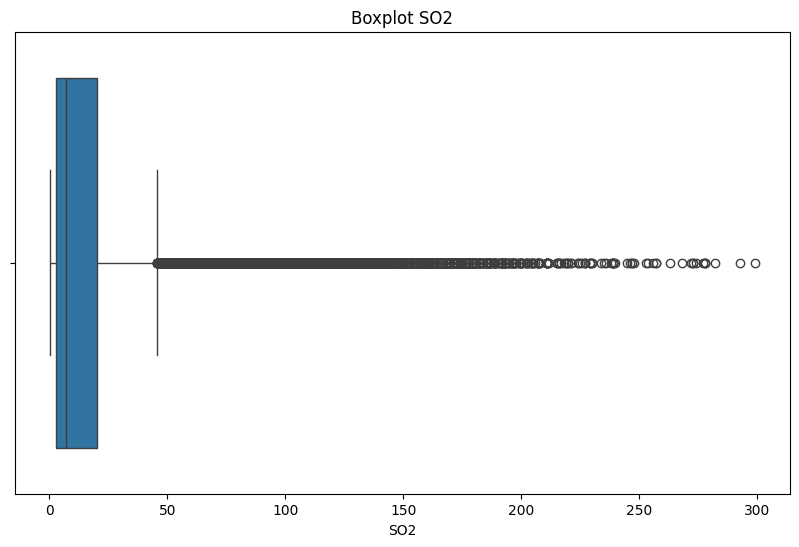

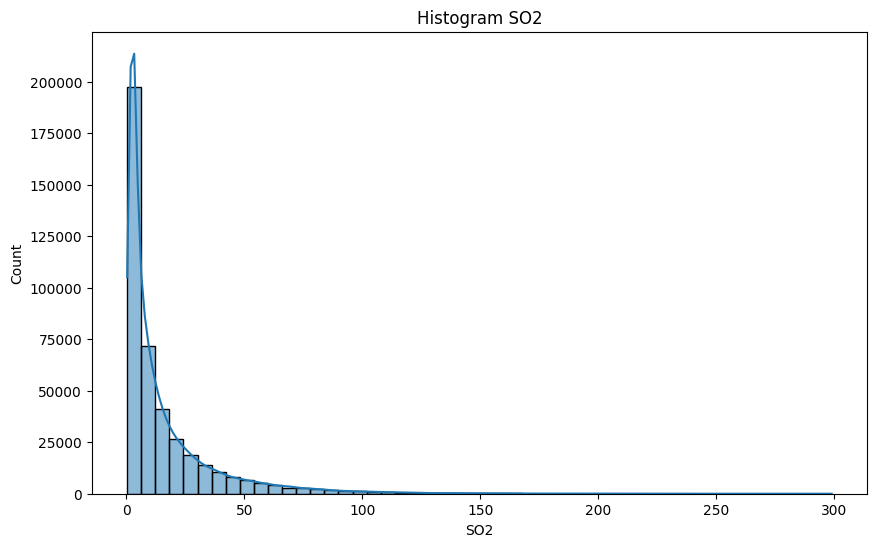

In [165]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=combined_data['SO2'])
plt.title('Boxplot SO2')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(combined_data['SO2'], bins=50, kde=True)
plt.title('Histogram SO2')
plt.show()

In [166]:
combined_data['SO2'] = combined_data['SO2'].mask(combined_data['SO2'] > upper_bound, upper_bound)
combined_data['SO2'] = combined_data['SO2'].mask(combined_data['SO2'] < lower_bound, lower_bound)

In [167]:
print(combined_data['SO2'].describe())

count    420768.000000
mean         13.516217
std          14.053026
min           0.285600
25%           3.000000
50%           7.000000
75%          20.000000
max          45.500000
Name: SO2, dtype: float64


In [168]:
print(combined_data['CO'].describe())

count    420768.000000
mean       1233.454288
std        1166.042001
min         100.000000
25%         500.000000
50%         900.000000
75%        1500.000000
max       10000.000000
Name: CO, dtype: float64


In [169]:
combined_data[combined_data['CO'] == combined_data['CO'].max()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,,,,,,
2015-12-01 06:00:00,24127,2015,12,1,6,453.0,453.0,31.0,184.0,10000.0,10.0,-0.8,1015.9,-1.4,0.0,ESE,0.6,Aotizhongxin
2015-12-25 04:00:00,24701,2015,12,25,4,501.0,509.0,18.0,130.0,10000.0,3.0,-3.7,1017.5,-3.7,0.0,ENE,1.0,Aotizhongxin
2015-12-25 09:00:00,24706,2015,12,25,9,412.0,452.0,13.0,143.0,10000.0,12.0,-3.6,1016.0,-3.7,0.0,SE,1.5,Aotizhongxin
2015-12-30 01:00:00,24818,2015,12,30,1,472.0,523.0,45.5,156.0,10000.0,15.0,-3.9,1024.0,-4.9,0.0,E,1.1,Aotizhongxin
2016-12-20 22:00:00,33383,2016,12,20,22,371.0,371.0,6.0,153.0,10000.0,3.0,0.0,1026.0,-1.9,0.0,S,1.2,Aotizhongxin
2016-12-20 23:00:00,33384,2016,12,20,23,397.0,397.0,6.0,157.0,10000.0,3.0,-0.3,1026.2,-2.0,0.0,ESE,0.9,Aotizhongxin
2014-01-04 12:00:00,7429,2014,1,4,12,92.0,102.0,45.5,59.0,10000.0,17.0,1.8,1011.7,-5.6,0.0,SSE,1.3,Changping
2015-06-04 23:00:00,19824,2015,6,4,23,36.0,102.0,5.0,49.0,10000.0,61.0,19.7,991.8,10.1,0.0,NW,1.6,Changping
2015-06-05 02:00:00,19827,2015,6,5,2,91.0,91.0,2.0,27.0,10000.0,18.0,18.6,990.0,10.9,0.0,N,1.4,Changping


In [170]:
combined_data['CO'].replace(1000, np.nan, inplace=True)

C:\Users\ichaa\AppData\Local\Temp\ipykernel_11608\3603690939.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_data['CO'].replace(1000, np.nan, inplace=True)


In [171]:
combined_data['CO'].interpolate(method='time', inplace=True)

C:\Users\ichaa\AppData\Local\Temp\ipykernel_11608\3411896619.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_data['CO'].interpolate(method='time', inplace=True)


In [172]:
combined_data[combined_data['CO'] == combined_data['CO'].max()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,,,,,,
2015-12-01 06:00:00,24127,2015,12,1,6,453.0,453.0,31.0,184.0,10000.0,10.0,-0.8,1015.9,-1.4,0.0,ESE,0.6,Aotizhongxin
2015-12-25 04:00:00,24701,2015,12,25,4,501.0,509.0,18.0,130.0,10000.0,3.0,-3.7,1017.5,-3.7,0.0,ENE,1.0,Aotizhongxin
2015-12-25 09:00:00,24706,2015,12,25,9,412.0,452.0,13.0,143.0,10000.0,12.0,-3.6,1016.0,-3.7,0.0,SE,1.5,Aotizhongxin
2015-12-30 01:00:00,24818,2015,12,30,1,472.0,523.0,45.5,156.0,10000.0,15.0,-3.9,1024.0,-4.9,0.0,E,1.1,Aotizhongxin
2016-12-20 22:00:00,33383,2016,12,20,22,371.0,371.0,6.0,153.0,10000.0,3.0,0.0,1026.0,-1.9,0.0,S,1.2,Aotizhongxin
2016-12-20 23:00:00,33384,2016,12,20,23,397.0,397.0,6.0,157.0,10000.0,3.0,-0.3,1026.2,-2.0,0.0,ESE,0.9,Aotizhongxin
2014-01-04 12:00:00,7429,2014,1,4,12,92.0,102.0,45.5,59.0,10000.0,17.0,1.8,1011.7,-5.6,0.0,SSE,1.3,Changping
2015-06-04 23:00:00,19824,2015,6,4,23,36.0,102.0,5.0,49.0,10000.0,61.0,19.7,991.8,10.1,0.0,NW,1.6,Changping
2015-06-05 02:00:00,19827,2015,6,5,2,91.0,91.0,2.0,27.0,10000.0,18.0,18.6,990.0,10.9,0.0,N,1.4,Changping


In [173]:
print(combined_data.isnull().sum())

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64


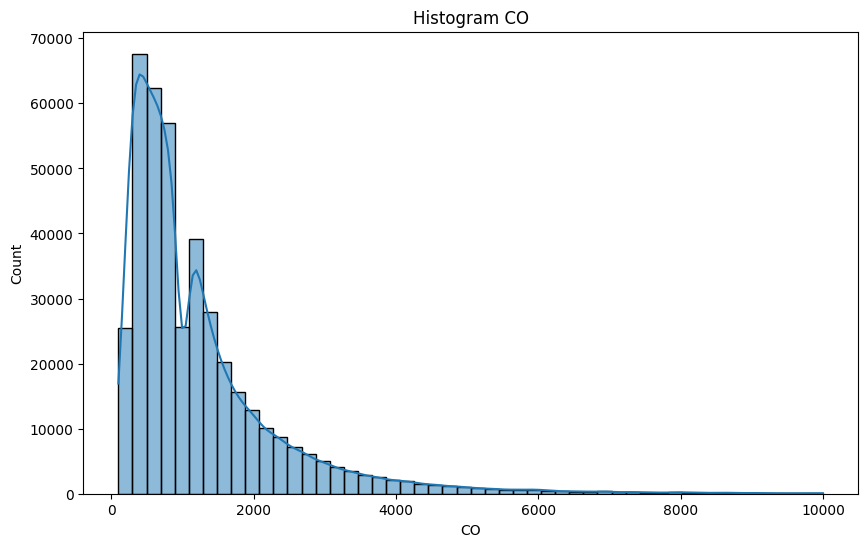

In [174]:
plt.figure(figsize=(10, 6))
sns.histplot(combined_data['CO'], bins=50, kde=True)
plt.title('Histogram CO')
plt.show()

In [175]:
Q1_CO = combined_data['CO'].quantile(0.25)
Q3_CO = combined_data['CO'].quantile(0.75)
IQR_CO = Q3_CO - Q1_CO

# Batas bawah dan atas untuk deteksi outlier
lower_bound_CO = Q1_CO - 1.5 * IQR_CO
upper_bound_CO = Q3_CO + 1.5 * IQR_CO
combined_data['CO'] = combined_data['CO'].mask(combined_data['CO'] > upper_bound_CO, upper_bound_CO)
combined_data['CO'] = combined_data['CO'].mask(combined_data['CO'] < lower_bound_CO, lower_bound_CO)

In [176]:
print(combined_data['CO'].describe())

count    420768.000000
mean       1130.061138
std         829.665768
min         100.000000
25%         500.000000
50%         800.000000
75%        1500.000000
max        3000.000000
Name: CO, dtype: float64


In [177]:
print(combined_data['O3'].describe())

count    420768.000000
mean         57.023507
std          56.613598
min           0.214200
25%          10.000000
50%          44.000000
75%          82.000000
max        1071.000000
Name: O3, dtype: float64


In [178]:
combined_data[combined_data['O3'] == combined_data['O3'].max()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,,,,,,
2013-08-15 23:00:00,4032,2013,8,15,23,195.0,206.0,6.0,40.0,1600.0,1071.0,29.5,995.6,25.3,2.2,SSE,3.3,Dongsi
2013-08-16 00:00:00,4033,2013,8,16,0,203.0,206.0,6.0,34.0,1500.0,1071.0,27.2,995.5,24.7,0.3,SSW,2.9,Dongsi
2013-08-16 17:00:00,4050,2013,8,16,17,206.0,267.0,7.0,65.0,2000.0,1071.0,30.1,992.8,28.5,0.0,E,1.4,Dongsi
2013-08-16 18:00:00,4051,2013,8,16,18,207.0,273.0,8.0,85.0,2200.0,1071.0,30.0,993.3,28.4,0.0,ENE,1.5,Dongsi
2013-08-16 19:00:00,4052,2013,8,16,19,187.0,222.0,8.0,86.0,2100.0,1071.0,29.5,993.6,28.4,0.0,ESE,1.2,Dongsi
2013-08-16 20:00:00,4053,2013,8,16,20,202.0,232.0,7.0,98.0,3000.0,1071.0,28.9,994.5,28.2,0.0,SSE,0.6,Dongsi
2013-08-16 21:00:00,4054,2013,8,16,21,202.0,242.0,7.0,95.0,3000.0,1071.0,28.8,994.1,28.3,0.5,SE,1.1,Dongsi
2013-08-16 22:00:00,4055,2013,8,16,22,198.0,233.0,7.0,102.0,2300.0,1071.0,28.4,994.1,28.1,0.0,E,0.8,Dongsi
2013-08-16 23:00:00,4056,2013,8,16,23,201.0,219.0,8.0,118.0,2700.0,1071.0,28.3,994.0,28.0,0.1,E,1.0,Dongsi


In [179]:
combined_data['O3'].replace(1071, np.nan, inplace=True) 
combined_data['O3'].interpolate(method='time', inplace=True) 
combined_data[combined_data['O3'] == combined_data['O3'].max()]

C:\Users\ichaa\AppData\Local\Temp\ipykernel_11608\214445021.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_data['O3'].replace(1071, np.nan, inplace=True)
C:\Users\ichaa\AppData\Local\Temp\ipykernel_11608\214445021.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,,,,,,
2013-08-16 02:00:00,4035,2013,8,16,2,64.0,15.0,3.0,19.0,800.0,1050.0,26.7,994.8,25.7,0.0,E,1.6,Dongsi


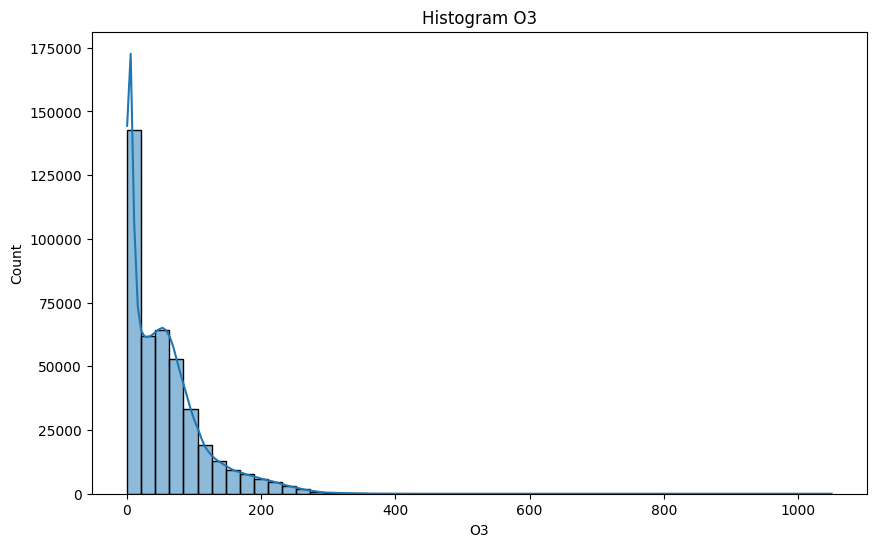

In [180]:
plt.figure(figsize=(10, 6))
sns.histplot(combined_data['O3'], bins=50, kde=True)
plt.title('Histogram O3')
plt.show()

In [181]:
Q1_O3 = combined_data['O3'].quantile(0.25)
Q3_O3 = combined_data['O3'].quantile(0.75)
IQR_O3 = Q3_O3 - Q1_O3

# Batas bawah dan atas untuk deteksi outlier
lower_bound_O3 = Q1_O3 - 1.5 * IQR_O3
upper_bound_O3 = Q3_O3 + 1.5 * IQR_O3
combined_data['O3'] = combined_data['O3'].mask(combined_data['O3'] > upper_bound_O3, upper_bound_O3)
combined_data['O3'] = combined_data['O3'].mask(combined_data['O3'] < lower_bound_O3, lower_bound_O3)

In [182]:
print(combined_data['O3'].describe())

count    420768.000000
mean         55.459362
std          51.543483
min           0.214200
25%          10.000000
50%          44.000000
75%          82.000000
max         190.000000
Name: O3, dtype: float64


In [183]:
print(combined_data['RAIN'].describe())

count    420768.000000
mean          0.064417
std           0.820626
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          72.500000
Name: RAIN, dtype: float64


In [184]:
combined_data[combined_data['RAIN'] == combined_data['RAIN'].max()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,,,,,,
2013-08-11 15:00:00,3928,2013,8,11,15,209.0,146.0,3.4272,37.1593,1500.0,158.7222,23.5,1000.4,23.0,72.5,NNE,3.9,Aotizhongxin
2013-08-11 15:00:00,3928,2013,8,11,15,211.0,157.0,3.0000,24.0000,1100.0,190.0000,23.5,1000.4,23.0,72.5,NNE,3.9,Guanyuan
2013-08-11 15:00:00,3928,2013,8,11,15,259.0,175.0,39.6984,47.8349,1400.0,101.0000,23.5,1000.4,23.0,72.5,NNE,3.9,Wanliu


In [185]:
combined_data[combined_data['RAIN'] > 50]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,,,,,,
2013-08-11 15:00:00,3928,2013,8,11,15,209.0,146.0,3.4272,37.1593,1500.0,158.7222,23.5,1000.4,23.0,72.5,NNE,3.9,Aotizhongxin
2015-07-18 18:00:00,20875,2015,7,18,18,27.0,30.0,2.0000,8.0000,500.0,155.0000,20.7,997.4,19.9,52.1,NE,2.3,Changping
2015-07-18 18:00:00,20875,2015,7,18,18,51.0,51.0,2.0000,16.0000,300.0,120.0000,20.7,997.4,19.9,52.1,NE,2.3,Dingling
2013-08-11 15:00:00,3928,2013,8,11,15,211.0,157.0,3.0000,24.0000,1100.0,190.0000,23.5,1000.4,23.0,72.5,NNE,3.9,Guanyuan
2013-08-11 15:00:00,3928,2013,8,11,15,259.0,175.0,39.6984,47.8349,1400.0,101.0000,23.5,1000.4,23.0,72.5,NNE,3.9,Wanliu


In [186]:
combined_data[combined_data['RAIN'] > 30]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,,,,,,
2013-08-11 15:00:00,3928,2013,8,11,15,209.0,146.0,3.4272,37.1593,1500.0,158.7222,23.5,1000.4,23.0,72.5,NNE,3.9,Aotizhongxin
2014-06-17 03:00:00,11356,2014,6,17,3,130.0,130.0,4.0000,12.0000,600.0,127.0000,18.4,997.6,18.4,40.7,ESE,0.2,Aotizhongxin
2015-06-26 04:00:00,20333,2015,6,26,4,112.0,112.0,2.0000,13.0000,600.0,104.0000,20.3,995.8,19.5,33.7,E,1.8,Aotizhongxin
2015-07-27 21:00:00,21094,2015,7,27,21,45.0,45.0,2.0000,19.0000,500.0,171.0000,22.9,1000.1,22.2,33.1,W,2.9,Aotizhongxin
2015-08-07 20:00:00,21357,2015,8,7,20,12.0,16.0,2.0000,21.0000,800.0,141.0000,19.7,1010.5,18.7,36.6,ENE,1.4,Aotizhongxin
2016-09-11 03:00:00,30964,2016,9,11,3,75.0,75.0,2.0000,21.0000,600.0,72.0000,19.7,1008.3,18.9,46.4,E,3.4,Aotizhongxin
2015-07-18 18:00:00,20875,2015,7,18,18,27.0,30.0,2.0000,8.0000,500.0,155.0000,20.7,997.4,19.9,52.1,NE,2.3,Changping
2015-07-19 19:00:00,20900,2015,7,19,19,60.0,60.0,2.0000,13.0000,600.0,128.0000,22.0,999.2,20.5,37.4,E,3.5,Changping
2015-07-18 18:00:00,20875,2015,7,18,18,51.0,51.0,2.0000,16.0000,300.0,120.0000,20.7,997.4,19.9,52.1,NE,2.3,Dingling


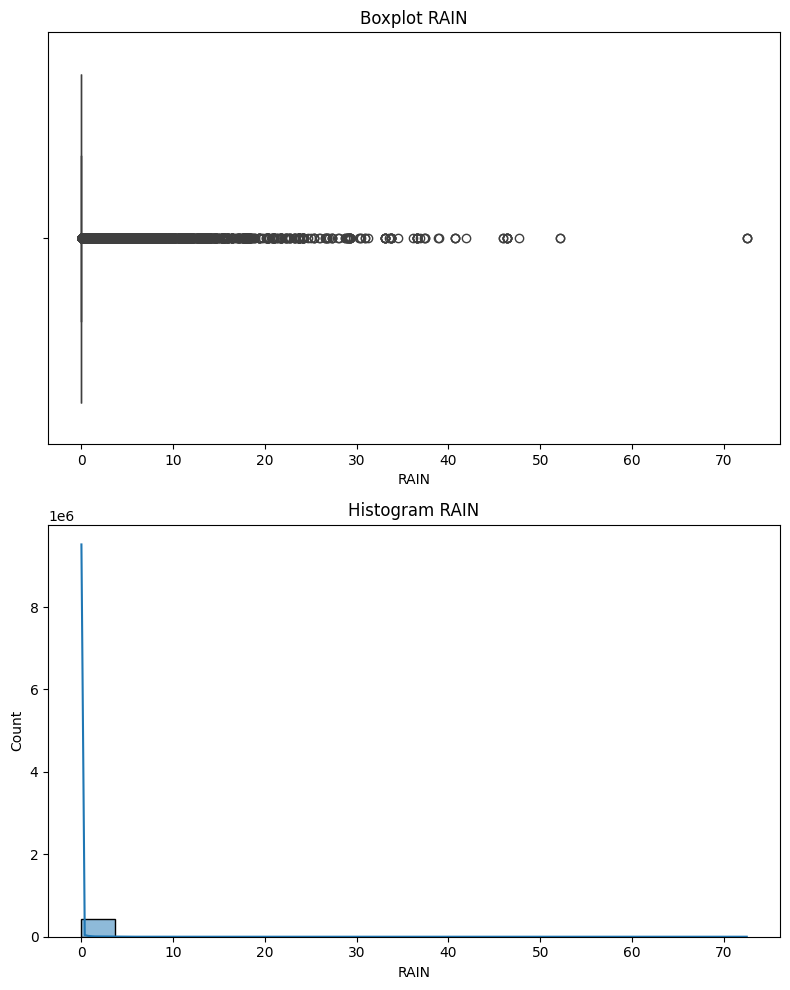

In [187]:
plt.figure(figsize=(8, 10))

plt.subplot(2, 1, 1)
sns.boxplot(x=combined_data['RAIN'])
plt.title("Boxplot RAIN")
plt.xlabel("RAIN")

plt.subplot(2, 1, 2)
sns.histplot(combined_data['RAIN'], kde=True)
plt.title("Histogram RAIN")
plt.xlabel("RAIN")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


In [188]:
Q1 = combined_data['RAIN'].quantile(0.25)
Q3 = combined_data['RAIN'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = combined_data[(combined_data['RAIN'] < lower_bound) | (combined_data['RAIN'] > upper_bound)]

print(outliers.loc['2013-08-11 15:00:00', ['RAIN', 'station']])

                     RAIN        station
datetime                                
2013-08-11 15:00:00  72.5   Aotizhongxin
2013-08-11 15:00:00  13.2      Changping
2013-08-11 15:00:00  13.2       Dingling
2013-08-11 15:00:00   0.3         Dongsi
2013-08-11 15:00:00  72.5       Guanyuan
2013-08-11 15:00:00  34.5        Gucheng
2013-08-11 15:00:00   3.6        Huairou
2013-08-11 15:00:00   0.3   Nongzhanguan
2013-08-11 15:00:00   7.1         Shunyi
2013-08-11 15:00:00   0.3        Tiantan
2013-08-11 15:00:00  72.5         Wanliu
2013-08-11 15:00:00  10.1  Wanshouxigong


In [189]:
combined_data[combined_data['RAIN'] == 72.5]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,,,,,,
2013-08-11 15:00:00,3928,2013,8,11,15,209.0,146.0,3.4272,37.1593,1500.0,158.7222,23.5,1000.4,23.0,72.5,NNE,3.9,Aotizhongxin
2013-08-11 15:00:00,3928,2013,8,11,15,211.0,157.0,3.0000,24.0000,1100.0,190.0000,23.5,1000.4,23.0,72.5,NNE,3.9,Guanyuan
2013-08-11 15:00:00,3928,2013,8,11,15,259.0,175.0,39.6984,47.8349,1400.0,101.0000,23.5,1000.4,23.0,72.5,NNE,3.9,Wanliu


In [190]:
combined_data.loc['2013-08-11', 'RAIN'].describe()

count    288.000000
mean       1.611806
std        7.889171
min        0.000000
25%        0.000000
50%        0.000000
75%        0.300000
max       72.500000
Name: RAIN, dtype: float64

In [191]:
combined_data['RAIN'].replace(72.5, np.nan, inplace=True) 
combined_data['RAIN'].interpolate(method='time', inplace=True) 
combined_data.loc['2013-08-11', 'RAIN'].describe()

C:\Users\ichaa\AppData\Local\Temp\ipykernel_11608\2424187352.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_data['RAIN'].replace(72.5, np.nan, inplace=True)
C:\Users\ichaa\AppData\Local\Temp\ipykernel_11608\2424187352.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

count    288.000000
mean       0.994097
std        3.276014
min        0.000000
25%        0.000000
50%        0.000000
75%        0.300000
max       34.500000
Name: RAIN, dtype: float64

In [192]:
stations = combined_data['station'].unique()
for station in stations:
    print(f"\nStatistik deskriptif untuk station: {station}")
    print(combined_data[combined_data['station'] == station].describe())



Statistik deskriptif untuk station: Aotizhongxin
                 No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean      82.524522    110.076654     14.701992     59.235862   1146.295626   
s

In [193]:
print(combined_data.info())
print(combined_data.describe())
print(combined_data.isnull().sum())
duplicates = combined_data.duplicated().sum()
print(f'Jumlah data duplikat: {duplicates}')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 420768 entries, 2013-03-01 00:00:00 to 2017-02-28 23:00:00
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    420768 non-null  float64
 6   PM10     420768 non-null  float64
 7   SO2      420768 non-null  float64
 8   NO2      420768 non-null  float64
 9   CO       420768 non-null  float64
 10  O3       420768 non-null  float64
 11  TEMP     420768 non-null  float64
 12  PRES     420768 non-null  float64
 13  DEWP     420768 non-null  float64
 14  RAIN     420768 non-null  float64
 15  wd       420768 non-null  object 
 16  WSPM     420768 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 77.1+ MB
None
      